# [CptS 215 Data Analytics Systems and Algorithms](https://github.com/gsprint23/cpts215)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
# Minimum Spanning Trees

Learner objectives for this lesson:
* Define a minimum spanning tree
* Implement and analyze a minimum spanning tree algorithm using Prim's algorithm


## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Miller and Ranum](http://interactivepython.org/runestone/static/pythonds/index.html)

## Minimum Spanning Tree Problem
Suppose we have a connected, undirected graph $G = (V, E)$. Suppose next we want to construct a second graph from $G$ called $G2 = (V, E2)$ such that $E2 \subset E$. If we select edges from $E$ to form $E2$ such that $\sum E2$ is minimized, yet every node in $V$ is connected by some path over $E2$ with no cycles, then $G2$ is actually a tree that spans every node in $V$ with minimal total edge weight. Such minimum weight spanning trees are useful for a variety of applications, for example:
* Sending messages from peer to peer in a network
* Laying cables to connect homes
    
For these cases, a minimum spanning tree would represent the least expensive path in terms of time (or money for laying cable) to connect each peer (or lay cable to each home).

## MST Definition
A minimum spanning tree (MST) of a graph $G = (V, E)$ is an acyclic subset of $E$ that connects all vertices in $V$ such that the sum of the weights in the MST is minimized.

## MST Algorithms
There are several MST construction algorithms, including:
* [Boruvka's algorithm](https://en.wikipedia.org/wiki/Bor%C5%AFvka%27s_algorithm)
* [Prim's algorithm](https://en.wikipedia.org/wiki/Prim%27s_algorithm)
* [Kruskal's algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm)

All of the above algorithms are [greedy algorithms](https://en.wikipedia.org/wiki/Greedy_algorithm) that always choose the locally optimal choice at each iteration. If there is a more optimal global solution with less optimal local choices, greedy algorithms typically will not find it. 

### Prim's Algorithm
We will describe and implement Prim's algorithm. For Prim's algorithm, the "locally optimal best choice" is following an edge with the lowest edge weight. We will only add an edge to the MST that connects to a vertex that is not yet in the spanning tree (prevents cycles). 

Prim's algorithm has many similarities to Dijkstra's algorithm. Both algorithms initialize vertices in the same way and make use of a priority queue the visits each node once. Let's take a look at the algorithm in pseudocode:

1. Initialize all vertices'
    * Distances to infinity (a number larger than any realistic distance)
    * Predecessors to 0
1. Enqueue all vertices to the priority queue `unvisitedQ` 
1. Set the origin vertex's distance to 0
1. While `unvisitedQ` is not empty:
    1. `currV` = dequeue `unvisitedQ`
    1. For each adjacent vertex `adjV` of `currV`
        1. `newCost` = weight of edge from `currV` to `adjV`
        1. If `adjV` in `unvisitedQ` and `newCost` is smaller than `adjV` path distance
            1. Update `adjV` path distance to `newCost`
            1. Set `adjV` predecessor to `currV`
            1. Update `unvisitedQ` with `adjV`'s new priority (`newCost`)
        
### Example
For the following graph:
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300">
Let's walk through Prim's algorithm step by step with d as the starting vertex.

1. Initially
    * Predecessors:
        * a's predecessor: 0
        * b's predecessor: 0
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: 0
        * f's predecessor: 0
        * g's predecessor: 0
    * `unvisitedQ`: front(d, 0), (a, inf), (b, inf), (c, inf), (e, inf), (f, inf), (g, inf)back
1. Dequeue (d, 0)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: d
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: d
        * f's predecessor: d
        * g's predecessor: 0
    * `unvisitedQ`: front(a, 5), (f, 6), (b, 9), (e, 15), (c, inf), (g, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300">
1. Dequeue (a, 5)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: d
        * f's predecessor: d
        * g's predecessor: 0
    * `unvisitedQ`: front(f, 6), (b, 7), (e, 15), (c, inf), (g, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims2.png" width="300">
1. Dequeue (f, 6)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: f
        * f's predecessor: d
        * g's predecessor: f
    * `unvisitedQ`: front(b, 7), (e, 8), (g, 11), (c, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims3.png" width="300">
1. Dequeue (b, 7)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: b
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: f
    * `unvisitedQ`: front(e, 7), (c, 8), (g, 11)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims4.png" width="300">
1. Dequeue (e, 7)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: front(c, 5), (g, 9)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims5.png" width="300">
1. Dequeue (c, 5)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: front(g, 9)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims6.png" width="300">
1. Dequeue (g, 9)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: Empty
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims7.png" width="300">
(images from [http://www.texample.net/media/tikz/examples/PDF/prims-algorithm.pdf](http://www.texample.net/media/tikz/examples/PDF/prims-algorithm.pdf))

In [5]:
class BinaryHeap:
    '''
    
    '''
    def __init__(self):
        '''
        heap_list[0] = 0 is a dummy value (not used)
        '''
        self.heap_list = [0]
        self.size = 0
        
    def __str__(self):
        '''
        
        '''
        return str(self.heap_list)
    
    def __len__(self):
        '''
        
        '''
        return self.size
    
    def __contains__(self, item):
        '''
        
        '''
        return item in self.heap_list
    
    def is_empty(self):
        '''
        compare the size attribute to 0
        '''
        return self.size == 0
    
    def find_min(self):
        '''
        the smallest item is at the root node (index 1)
        '''
        if self.size > 0:
            min_val = self.heap_list[1]
            return min_val
        return None
        
    def insert(self, item_tuple):
        '''
        append the item to the end of the list (maintains complete tree property)
        violates the heap order property
        call percolate up to move the new item up to restore the heap order property
        '''
        self.heap_list.append(item_tuple)
        self.size += 1
        self.percolate_up(self.size)
        
    def del_min(self):
        '''
        min item in the tree is at the root
        replace the root with the last item in the list (maintains complete tree property)
        violates the heap order property
        call percolate down to move the new root down to restore the heap property
        '''
        min_val = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down(1)
        return min_val

    def min_child(self, index):
        '''
        return the index of the smallest child
        if there is no right child, return the left child
        if there are two children, return the smallest of the two
        '''
        if index * 2 + 1 > self.size:
            return index * 2
        else:
            if self.heap_list[index * 2][1] < self.heap_list[index * 2 + 1][1]:
                return index * 2
            else:
                return index * 2 + 1
            
    def build_heap(self, alist):
        '''
        build a heap from a list of keys to establish complete tree property
        starting with the first non leaf node 
        percolate each node down to establish heap order property
        '''
        index = len(alist) // 2
        self.size = len(alist)
        self.heap_list = [0] + alist[:]
        while (index > 0):
            self.percolate_down(index)
            index -= 1
        
    def percolate_up(self, index):
        '''
        compare the item at index with its parent
        if the item is less than its parent, swap!
        continue comparing until we hit the top of tree
        (can stop once an item is swapped into a position where it is greater than its parent)
        '''
        while index // 2 > 0:
            if self.heap_list[index][1] < self.heap_list[index // 2][1]:
                temp = self.heap_list[index // 2]
                self.heap_list[index // 2] = self.heap_list[index]
                self.heap_list[index] = temp
            index //= 2
            
    def percolate_down(self, index):
        '''
        compare the item at index with its smallest child
        if the item is greater than its smallest child, swap!
        continue continue while there are children to compare with
        (can stop once an item is swapped into a position where it is less than both children)
        '''
        while (index * 2) <= self.size:
            mc = self.min_child(index)
            if self.heap_list[index][1] > self.heap_list[mc][1]:
                temp = self.heap_list[index]
                self.heap_list[index] = self.heap_list[mc]
                self.heap_list[mc] = temp
            index = mc
            
    def decrease_key(self, item_tuple):
        '''
        decrease the priority associated with a key
        first, find the index of key
        replace the node at the key's index with the last item in the list (maintains complete tree property)
        violates the heap order property
        call percolate down to move the new root down to restore the heap property
        re-insert the key with the new updated priority
        '''
        key = item_tuple[0]
        index = -1
        for i in range(1, len(self.heap_list)):
            tup = self.heap_list[i]
            if tup[0] == key:
                index = i
                break
        self.heap_list[index] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down(index)
        self.insert(item_tuple)
        
class Vertex:
    '''
    keep track of the vertices to which it is connected, and the weight of each edge
    '''
    def __init__(self, key, distance=0, predecessor=None):
        '''
        
        '''
        self.ID = key
        self.distance = distance
        self.predecessor = predecessor
        self.connected_to = {}

    def add_neighbor(self, neighbor, weight=0):
        '''
        add a connection from this vertex to anothe
        '''
        self.connected_to[neighbor] = weight

    def __str__(self):
        '''
        returns all of the vertices in the adjacency list, as represented by the connectedTo instance variable
        '''
        return str(self.ID) + ' connected to: ' + str([x.ID for x in self.connected_to])

    def get_connections(self):
        '''
        
        '''
        return self.connected_to.keys()

    def get_ID(self):
        '''
        
        '''
        return self.ID

    def get_weight(self, neighbor):
        '''
        returns the weight of the edge from this vertex to the vertex passed as a parameter
        '''
        return self.connected_to[neighbor]
    
    def get_distance(self):
        '''
        
        '''
        return self.distance
    
    def get_predecessor(self):
        '''
        
        '''
        return self.predecessor
    
    def set_distance(self, dist):
        '''
        
        '''
        self.distance = dist
        
    def set_predecessor(self, pred):
        '''
        
        '''
        self.predecessor = pred
    
class Graph:
    '''
    contains a dictionary that maps vertex names to vertex objects. 
    '''
    def __init__(self):
        '''
        
        '''
        self.vert_list = {}
        self.num_vertices = 0
        
    def __str__(self):
        '''
        
        '''
        edges = ""
        for vert in self.vert_list.values():
            for vert2 in vert.get_connections():
                edges += "(%s, %s: %d)\n" %(vert.get_ID(), vert2.get_ID(), vert.get_weight(vert2))
        return edges

    def add_vertex(self, key, distance=0, predecessor=None):
        '''
        adding vertices to a graph 
        '''
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(key, distance, predecessor)
        self.vert_list[key] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        '''
        
        '''
        if n in self.vert_list:
            return self.vert_list[n]
        else:
            return None

    def __contains__(self, n):
        '''
        in operator
        '''
        return n in self.vert_list

    def add_edge(self, f, t, cost=0):
        '''
        connecting one vertex to another
        '''
        if f not in self.vert_list:
            nv = self.add_vertex(f)
        if t not in self.vert_list:
            nv = self.add_vertex(t)
        self.vert_list[f].add_neighbor(self.vert_list[t], cost)

    def get_vertices(self):
        '''
        returns the names of all of the vertices in the graph
        '''
        return self.vert_list.keys()

    def __iter__(self):
        '''
        for functionality
        '''
        return iter(self.vert_list.values())

In [6]:
import sys # for the "maxsize" of an int for representing infinity

def prims_algorithm(aGraph, start):
    '''

    '''
    pq = BinaryHeap()
    start.set_distance(0)
    pq.build_heap([(v, v.get_distance()) for v in aGraph])
    while not pq.is_empty():
        curr_tuple = pq.del_min()
        currV = curr_tuple[0]
        for adjV in currV.get_connections():
            new_cost = currV.get_weight(adjV)
            adjV_tuple = (adjV, adjV.get_distance())
            if adjV_tuple in pq and new_cost < adjV.get_distance():
                adjV.set_distance(new_cost)
                adjV.set_predecessor(currV)
                pq.decrease_key((adjV, new_cost))

import networkx as nx # to visualize the MST
import matplotlib.pyplot as plt
%matplotlib inline

def display_prim_results(g, origin_vertex):
    '''
    display the MST
    '''
    nx_graph = nx.Graph()
    for v in g:
        nx_graph.add_node(v.get_ID())
        if v.get_predecessor():
            nx_graph.add_edge(v.get_ID(), v.get_predecessor().get_ID(), weight=v.get_weight(v.get_predecessor()))
    pos = nx.spring_layout(nx_graph)
    nx.draw_networkx_nodes(nx_graph, pos, node_size=700)
    nx.draw_networkx_edges(nx_graph, pos, width=6)
    nx.draw_networkx_labels(nx_graph, pos, font_size=20, font_family='sans-serif')
    elabels = {edge:nx_graph[edge[0]][edge[1]]["weight"] for i, edge in enumerate(nx_graph.edges())}
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=elabels, font_size=16)
    plt.axis('off')

### Example 1
Build the example graph:
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300">

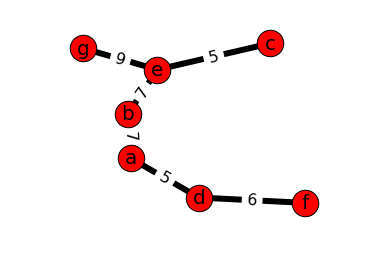

In [7]:
g = Graph()
g.add_vertex("a", sys.maxsize)
g.add_vertex("b", sys.maxsize)
g.add_vertex("c", sys.maxsize)
g.add_vertex("d", sys.maxsize)
g.add_vertex("e", sys.maxsize)
g.add_vertex("f", sys.maxsize)
g.add_vertex("g", sys.maxsize)

g.add_edge("a", "b", 7)
g.add_edge("b", "a", 7)

g.add_edge("a", "d", 5)
g.add_edge("d", "a", 5)

g.add_edge("b", "c", 8)
g.add_edge("c", "b", 8)

g.add_edge("b", "d", 9)
g.add_edge("d", "b", 9)

g.add_edge("b", "e", 7)
g.add_edge("e", "b", 7)

g.add_edge("c", "e", 5)
g.add_edge("e", "c", 5)

g.add_edge("d", "e", 15)
g.add_edge("e", "d", 15)

g.add_edge("d", "f", 6)
g.add_edge("f", "d", 6)

g.add_edge("e", "f", 8)
g.add_edge("f", "e", 8)

g.add_edge("e", "g", 9)
g.add_edge("g", "e", 9)

g.add_edge("f", "g", 11)
g.add_edge("g", "f", 11)

origin_vertex = g.get_vertex("a")
prims_algorithm(g, origin_vertex)
display_prim_results(g, origin_vertex)

### Example 2
Build the Miller and Ranum Prim's algorithm example graph:
<img src="http://interactivepython.org/runestone/static/pythonds/_images/mst1.png" width="400">
(image from [http://interactivepython.org/runestone/static/pythonds/_images/mst1.png](http://interactivepython.org/runestone/static/pythonds/_images/mst1.png))

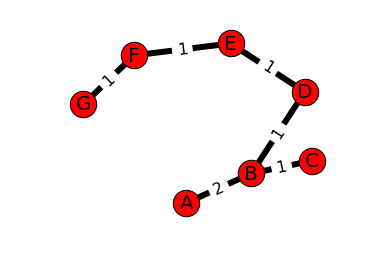

In [8]:
# build the Miller and Ranum Prim's example
g = Graph()
g.add_vertex("A", sys.maxsize)
g.add_vertex("B", sys.maxsize)
g.add_vertex("C", sys.maxsize)
g.add_vertex("D", sys.maxsize)
g.add_vertex("E", sys.maxsize)
g.add_vertex("F", sys.maxsize)
g.add_vertex("G", sys.maxsize)

g.add_edge("A", "B", 2)
g.add_edge("B", "A", 2)

g.add_edge("A", "C", 3)
g.add_edge("C", "A", 3)

g.add_edge("B", "C", 1)
g.add_edge("C", "B", 1)

g.add_edge("B", "D", 1)
g.add_edge("D", "B", 1)

g.add_edge("D", "E", 1)
g.add_edge("E", "D", 1)

g.add_edge("B", "E", 4)
g.add_edge("E", "B", 4)

g.add_edge("E", "F", 1)
g.add_edge("F", "E", 1)

g.add_edge("C", "F", 5)
g.add_edge("F", "C", 5)

g.add_edge("F", "G", 1)
g.add_edge("G", "F", 1)

origin_vertex = g.get_vertex("A")
prims_algorithm(g, origin_vertex)
display_prim_results(g, origin_vertex)

## Algorithm Analysis
Prim's minimum spanning tree algorithm has a runtime that is dependent on the data structure used for the priority queue. An implementation using a binary heap has a runtime of $\mathcal{O}(V log(V) + E log(V)) = \mathcal{O}((V + E)log(V))$ where $V$ is the number of vertices in the graph and $E$ is the number of edges. Note that this is the same running time as Dijkstra's algorithm.

## Practice Problems

### 1
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5f/CPT-Graphs-undirected-weighted.svg" width="300">
(image from [https://upload.wikimedia.org/wikipedia/commons/5/5f/CPT-Graphs-undirected-weighted.svg](https://upload.wikimedia.org/wikipedia/commons/5/5f/CPT-Graphs-undirected-weighted.svg)) 

Trace the execution of Prim's algorithm for the above graph to find the minimum spanning tree of the graph. 

### 2
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/CPT-Graphs-directed-weighted.svg/200px-CPT-Graphs-directed-weighted.svg.png" width="300">
(image from [https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/CPT-Graphs-directed-weighted.svg/200px-CPT-Graphs-directed-weighted.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/CPT-Graphs-directed-weighted.svg/200px-CPT-Graphs-directed-weighted.svg.png)) 

Trace the execution of Prim's algorithm for the above graph to find the minimum spanning tree of the graph. 